# Stable Diffusion Application

> [Avishake Adhikary](https://www.github.com/AvishakeAdhikary)

# Install Dependencies

In [1]:
! pip install torch diffusers matplotlib transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Dependencies & Initalize Constants and Variables


In [2]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt

In [3]:
authorization_token = ""
modelid = "CompVis/stable-diffusion-v1-4"
device = "cuda"

In [4]:
pipe = StableDiffusionPipeline.from_pretrained(modelid, revision="fp16", torch_dtype=torch.float16, use_auth_token=authorization_token)

pipe.to(device)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

Enter your promt: cat in a party wearing a hat


  0%|          | 0/50 [00:00<?, ?it/s]

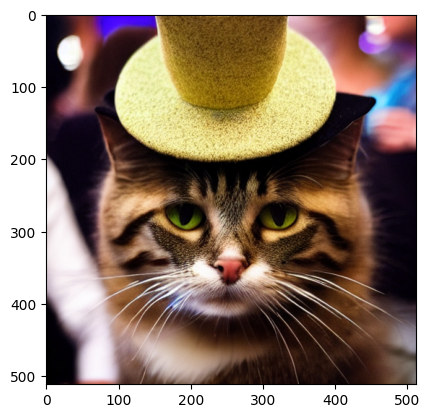

In [5]:
with autocast(device):
  textprompt = str(input("Enter your promt: "))

  image = pipe(textprompt, guidance_scale=8.5).images[0]

  imgplot = plt.imshow(image)